# Cryptocurrency Trends Analysis 

## by Dongsuk Jeong

> In this project, I will use Cryptowatch API to collect past market price information of big cryptocurrencies such as bitcoin, etherium, and dogecoin. The purpose of this project is to show how powerful the data visualization would be by comparing a seperate version of graph and a combined version of graph from same data. Moreover, I will use regression model to see how much price of the other cryptocurrencies would be affect to the price of Doge coin  First thig first, Let's import neccessary library first 

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import statsmodels.api as sm

<br>Use `request` to call api and import data. `'periods': 3600` means setting up the time period for 1 hour.

In [25]:
req = requests.get('https://api.cryptowat.ch/markets/oinbase-pro/btcusd/ohlc', params={'periods': '3600'})
data = req.json()

<br>Change json file to pandas data frame format and drop unnecessary column.

In [26]:
df = pd.DataFrame(data['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

In [27]:
df.drop(columns=['QuoteVolume'], inplace=True)

<br>Let's check how our data frame looks like and overall information.

In [28]:
df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,1629878400,48371.8,48494.6,48075.9,48151.9,41.631173
1,1629882000,48152.0,48176.6,47276.0,47281.0,266.092147
2,1629885600,47278.4,47576.0,47146.3,47293.2,150.368752
3,1629889200,47266.4,47585.1,47200.0,47516.6,66.573789
4,1629892800,47516.6,47642.8,47348.6,47591.5,103.537011


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CloseTime   1000 non-null   int64  
 1   OpenPrice   1000 non-null   float64
 2   HighPrice   1000 non-null   float64
 3   LowPrice    1000 non-null   float64
 4   ClosePrice  1000 non-null   float64
 5   Volume      1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


<br>It looks pretty good, but closeTime does not make sense with Unix timestamp format. Let's change it to more human friendly format using `to_datetime()` function.

In [31]:
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')

In [32]:
df.set_index('CloseTime', inplace=True)

In [33]:
df.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2021-08-25 08:00:00,48371.8,48494.6,48075.9,48151.9,41.631173
2021-08-25 09:00:00,48152.0,48176.6,47276.0,47281.0,266.092147
2021-08-25 10:00:00,47278.4,47576.0,47146.3,47293.2,150.368752
2021-08-25 11:00:00,47266.4,47585.1,47200.0,47516.6,66.573789
2021-08-25 12:00:00,47516.6,47642.8,47348.6,47591.5,103.537011


In [22]:
df.to_csv('data.csv', index=False)

> when you want to read the file next time, df = pd.read_csv('data.csv')

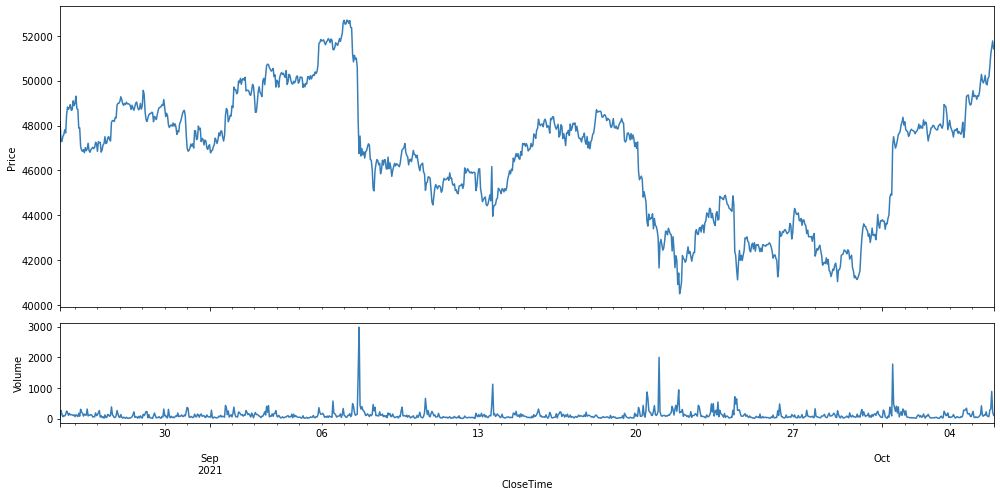

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df['ClosePrice'].plot(ax=ax1, color='#377eb8')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df['Volume'].plot(ax=ax2, color='#377eb8')
ax2.set_ylabel('Volume')

fig.tight_layout()

In [35]:
req2 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/ethusd/ohlc', params={'periods': '3600'})
data2 = req2.json()

In [36]:
data2

{'result': {'3600': [[1629878400,
    3201.69,
    3212.27,
    3174.29,
    3184.35,
    2139.82412488,
    6831707.480052205],
   [1629882000,
    3183.86,
    3187.82,
    3100.55,
    3104.6,
    10508.9757208,
    32977635.980972704],
   [1629885600,
    3104.67,
    3119.66,
    3079.92,
    3098.19,
    8704.69409607,
    26985695.40445963],
   [1629889200,
    3098.02,
    3130.79,
    3094.5,
    3125.21,
    4289.68917329,
    13361693.93594438],
   [1629892800,
    3125.21,
    3143.45,
    3113.28,
    3140.39,
    3924.49401445,
    12277097.57681065],
   [1629896400,
    3140.43,
    3156.07,
    3114.27,
    3150.68,
    6291.96597207,
    19750478.176759697],
   [1629900000,
    3150.34,
    3160.42,
    3122.83,
    3134.09,
    6272.4283205,
    19742520.504855264],
   [1629903600,
    3134.18,
    3192.08,
    3101.49,
    3188.68,
    12961.56501494,
    40847440.45109246],
   [1629907200,
    3188.74,
    3225,
    3175.94,
    3218.84,
    8213.45626039,
    26255

In [37]:
df2 = pd.DataFrame(data2['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

In [38]:
df2.drop(columns=['QuoteVolume'], inplace=True)

In [39]:
df2['CloseTime'] = pd.to_datetime(df2['CloseTime'], unit='s')

In [40]:
df2.set_index('CloseTime', inplace=True)

In [41]:
df2.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2021-08-25 08:00:00,3201.69,3212.27,3174.29,3184.35,2139.824125
2021-08-25 09:00:00,3183.86,3187.82,3100.55,3104.60,10508.975721
2021-08-25 10:00:00,3104.67,3119.66,3079.92,3098.19,8704.694096
2021-08-25 11:00:00,3098.02,3130.79,3094.50,3125.21,4289.689173
2021-08-25 12:00:00,3125.21,3143.45,3113.28,3140.39,3924.494014


In [21]:
df2.to_csv('data2.csv', index=False)

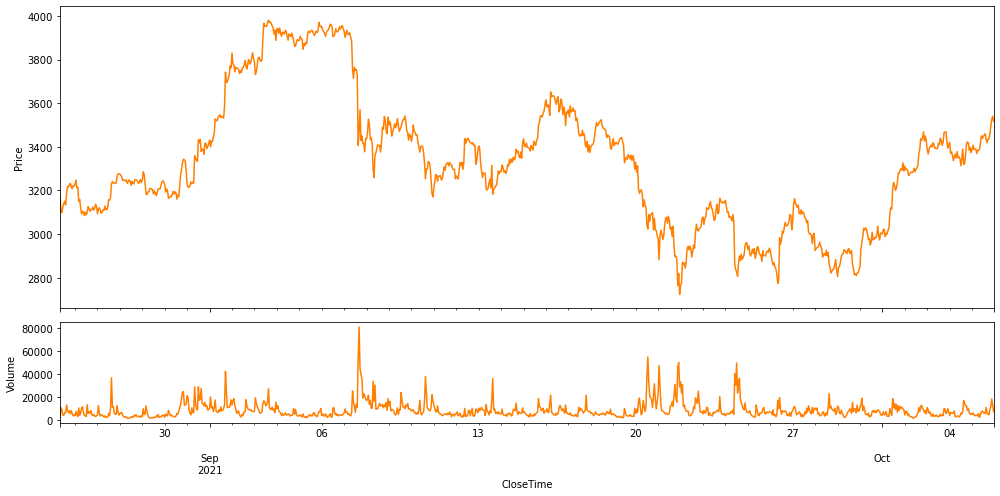

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df2['ClosePrice'].plot(ax=ax1, color='#ff7f00')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df2['Volume'].plot(ax=ax2, color='#ff7f00')
ax2.set_ylabel('Volume')

fig.tight_layout()

In [4]:
req3 = requests.get('https://api.cryptowat.ch/markets/bitfinex/dogeusd/ohlc', params={'periods': '3600'})
data3 = req3.json()

In [5]:
data3

{'result': {'3600': [[1629871200,
    0.2899,
    0.29549,
    0.2899,
    0.29549,
    167001.48516064,
    48837.82296812864],
   [1629874800,
    0.29549,
    0.29683,
    0.29327,
    0.29342,
    820956.95213734,
    243193.08068000915],
   [1629878400,
    0.29421,
    0.29704,
    0.29133,
    0.29187,
    282162.63002256,
    82931.16710038041],
   [1629882000,
    0.29171,
    0.29224,
    0.28142,
    0.28171,
    3149221.57830359,
    906318.3524518834],
   [1629885600,
    0.28171,
    0.28553,
    0.27977,
    0.28046,
    2064498.55772904,
    584428.4972430139],
   [1629889200,
    0.28016,
    0.28542,
    0.2795,
    0.28456,
    447972.92105377,
    126707.84923423083],
   [1629892800,
    0.28418,
    0.28706,
    0.28213,
    0.28626,
    291556.56598416,
    82924.46423647406],
   [1629896400,
    0.28626,
    0.28783,
    0.28422,
    0.28783,
    504323.16920674,
    144900.36056578386],
   [1629900000,
    0.28769,
    0.28986,
    0.28254,
    0.28348,
    1626

In [19]:
df3.drop(columns=['QuoteVolume'], inplace=True)

In [21]:
df3['CloseTime'] = pd.to_datetime(df3['CloseTime'], unit='s')

In [23]:
df3.set_index('CloseTime', inplace=True)

In [24]:
df3.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2021-08-20 08:00:00,3228.900000,3233.000000,3208.2,3215.6,621.814714
2021-08-20 09:00:00,3216.000000,3226.400000,3190.5,3200.2,864.357829
2021-08-20 10:00:00,3198.800000,3217.000000,3196.6,3209.6,597.838972
2021-08-20 11:00:00,3207.900000,3224.700000,3205.1,3217.0,266.985315
2021-08-20 12:00:00,3217.913789,3217.913789,3198.7,3205.4,323.890600


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df3['ClosePrice'].plot(ax=ax1, color='#4daf4a')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df3['Volume'].plot(ax=ax2, color='#4daf4a')
ax2.set_ylabel('Volume')

fig.tight_layout()

In [10]:
req4 = requests.get('https://api.cryptowat.ch/markets/bitfinex/usdtusd/ohlc', params={'periods': '3600'})
data4 = req4.json()

In [11]:
data4

{'result': {'3600': [[1629874800,
    1.0001,
    1.0002,
    1.0001,
    1.0001,
    250483.03622257,
    250525.61310491338],
   [1629878400,
    1.0002,
    1.0002,
    1.0001,
    1.0002,
    991728.40749976,
    991852.2062181182],
   [1629882000,
    1.0001,
    1.0002,
    1.0001,
    1.0002,
    3742380.30793327,
    3743084.0730631193],
   [1629885600,
    1.0002,
    1.0004,
    1.0001,
    1.0004,
    6948644.46825147,
    6950183.637954476],
   [1629889200,
    1.0004,
    1.0004,
    1.0003,
    1.0004,
    1425684.34069257,
    1426233.7995888593],
   [1629892800,
    1.0004,
    1.0004,
    1,
    1.0001,
    8066404.19698659,
    8067376.181211066],
   [1629896400,
    1.0001,
    1.0002,
    1,
    1.0001,
    3900410.60911628,
    3900589.764981371],
   [1629900000, 1, 1.0002, 1, 1, 16724201.09606029, 16724676.185383452],
   [1629903600, 1, 1.0003, 1, 1, 7023071.00037066, 7023184.211910735],
   [1629907200,
    1,
    1.0003,
    0.99997,
    1.0002,
    3770927.82562

In [12]:
req5 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/adausd/ohlc', params={'periods': '3600'})
data5 = req5.json()

In [13]:
data5

{'result': {'3600': [[1629878400,
    2.7561,
    2.7792,
    2.7344,
    2.7516,
    1582973.67,
    4370263.388331],
   [1629882000, 2.7516, 2.7554, 2.604, 2.6171, 8933176.06, 23824135.005064],
   [1629885600, 2.6175, 2.6755, 2.61, 2.6323, 6025030.59, 15898837.108267],
   [1629889200, 2.6326, 2.6777, 2.6114, 2.6583, 5013783.65, 13286071.554686],
   [1629892800, 2.6581, 2.6723, 2.6307, 2.6711, 4480040.13, 11894492.170396],
   [1629896400, 2.6711, 2.725, 2.6481, 2.7135, 6264582.68, 16851414.953386],
   [1629900000, 2.7117, 2.73, 2.6503, 2.6564, 6108648.15, 16473265.714549],
   [1629903600, 2.6569, 2.744, 2.6227, 2.7404, 9920914.4, 26725432.092408],
   [1629907200, 2.7403, 2.7785, 2.7058, 2.7704, 8965670.62, 24564160.67346],
   [1629910800, 2.7709, 2.8, 2.7482, 2.7628, 10633623.05, 29505894.917237],
   [1629914400, 2.7613, 2.7742, 2.7215, 2.763, 5802240.9, 15988702.081262],
   [1629918000, 2.763, 2.777, 2.7445, 2.7616, 4230331.4, 11679020.204217],
   [1629921600, 2.7607, 2.7897, 2.7276,

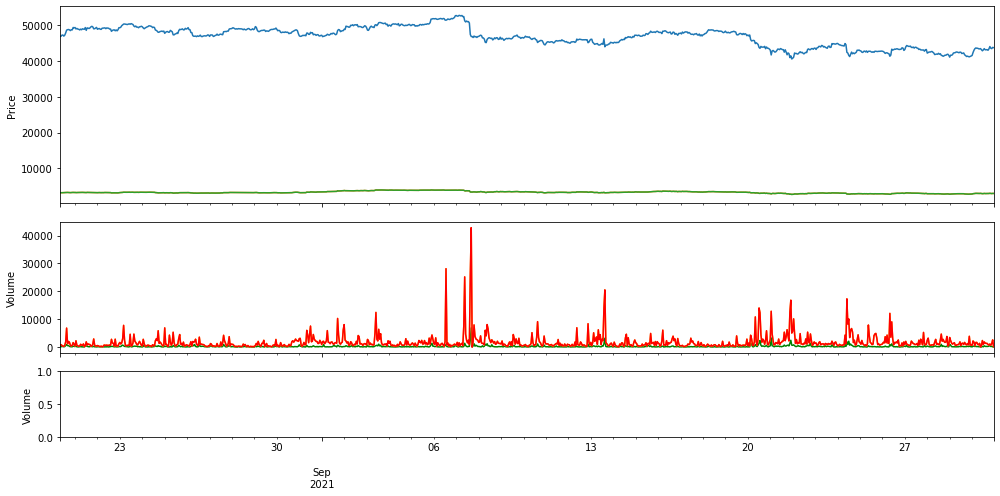

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 2, 1]})
df['ClosePrice'].plot(ax=ax1)
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')
df2['ClosePrice'].plot(ax=ax1)
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')
df3['ClosePrice'].plot(ax=ax1)
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df['Volume'].plot(ax=ax2, color='green')
ax2.set_ylabel('Volume')
df2['Volume'].plot(ax=ax2, color='orange')
ax3.set_ylabel('Volume')
df3['Volume'].plot(ax=ax2, color='red')
ax3.set_ylabel('Volume')


fig.tight_layout()

In [65]:
lm = sm.OLS(dfR1['ClosePrice'], dfR1[['OpenPrice', 'HighPrice', 'LowPrice','Volume', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClosePrice   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.960e+04
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:10:33   Log-Likelihood:                -6361.2
No. Observations:                1000   AIC:                         1.273e+04
Df Residuals:                     995   BIC:                         1.276e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
OpenPrice     -0.6249      0.025    -24.951      0.000      -0.674      -0.576
HighPrice      0.7089      0.029     24.755      0.000       0.653       0.765
LowPrice       0.9157      0.029     31.572      0.000       0.859       0.973
Volume         0.2296      0.024      9.401      0.000       0.182       0.278
intercept     21.8819     82.478      0.265      0.791    -139.969     183.732
==============================================================================
Omnibus:                      183.833   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3872.846
Skew:                           0.092   Prob(JB):                         0.00
Kurtosis:                      12.639   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""